# **🤖 ML Modeling**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="whitegrid")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data_ml.csv to cleaned_data_ml.csv


In [3]:
df_ml = pd.read_csv('cleaned_data_ml.csv')

In [9]:
df_ml.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,29.85,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,...,1889.50,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,...,108.15,1,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,1,...,1840.75,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,151.65,1,0,1,0,0,0,0,1,0


In [6]:
df_ml.drop('customerID', axis=1, inplace=True)

In [12]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   OnlineSecurity                         7032 non-null   int64  
 7   OnlineBackup                           7032 non-null   int64  
 8   DeviceProtection                       7032 non-null   int64  
 9   TechSupport                            7032 non-null   int64  
 10  StreamingTV                            7032 non-null   int64  
 11  Stre

## **Train-Test Split**

In [10]:
from sklearn.model_selection import train_test_split

X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(5625, 23) (1407, 23)


## **Scaling**

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Logistic Regression**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7882018479033405
Confusion Matrix:
 [[916 117]
 [181 193]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



ROC AUC Score: 0.8319157637533584


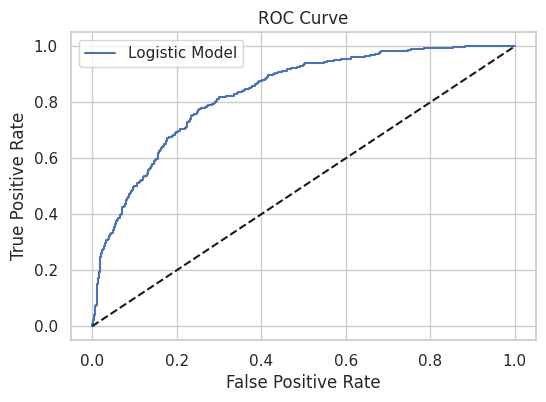

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve

# Probabilities
y_probs = model.predict_proba(X_test_scaled)[:,1]

# ROC AUC
auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='Logistic Model')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
